<a href="https://colab.research.google.com/github/ssv112/911-calls-project---Kaggle/blob/master/MNIST_DATA_SET_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image=X_train[0]

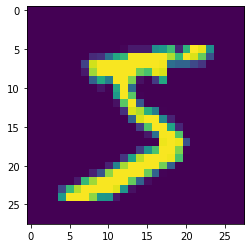

In [6]:
plt.imshow(single_image)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_example= to_categorical(y_train)

In [9]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_c_train=to_categorical(y_train,num_classes=10)

In [11]:
y_c_test=to_categorical(y_test,num_classes=10)

In [12]:
single_image.min()

0

In [13]:
X_train= X_train/255
X_test= X_test/255

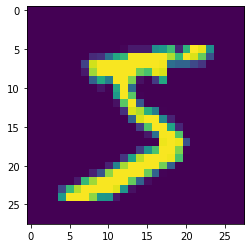

In [14]:
scaled_IMAGE= X_train[0]
plt.imshow(scaled_IMAGE)

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train= X_train.reshape(60000, 28, 28,1)

In [17]:
X_test= X_test.reshape(10000, 28, 28,1)

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [20]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1, 1),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
          



In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop= EarlyStopping(patience=1)

In [23]:
model.fit(x=X_train,
    y=y_c_train,
    batch_size=256,
    epochs=10,
    verbose=1,
    callbacks=[early_stop],
    validation_data=(X_test,y_c_test))

Epoch 1/10
235/235 [==============================] - 24s 101ms/step - loss: 0.2781 - accuracy: 0.9217 - val_loss: 0.0982 - val_accuracy: 0.9716
Epoch 2/10
235/235 [==============================] - 24s 100ms/step - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.0602 - val_accuracy: 0.9811
Epoch 3/10
235/235 [==============================] - 23s 100ms/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 0.0563 - val_accuracy: 0.9814
Epoch 4/10
235/235 [==============================] - 23s 100ms/step - loss: 0.0408 - accuracy: 0.9879 - val_loss: 0.0405 - val_accuracy: 0.9863
Epoch 5/10
235/235 [==============================] - 23s 100ms/step - loss: 0.0321 - accuracy: 0.9903 - val_loss: 0.0404 - val_accuracy: 0.9872
Epoch 6/10
235/235 [==============================] - 24s 100ms/step - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.0373 - val_accuracy: 0.9869
Epoch 7/10
235/235 [==============================] - 23s 100ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.0399 - val_ac

In [24]:
metrics= pd.DataFrame(model.history.history)

In [25]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.278057,0.921733,0.098172,0.9716
1,0.080632,0.976567,0.060195,0.9811
2,0.053527,0.984333,0.056340,0.9814
3,0.040802,0.987883,0.040471,0.9863
4,0.032081,0.990333,0.040417,0.9872
5,0.026381,0.992100,0.037270,0.9869
6,0.020759,0.994067,0.039851,0.9857


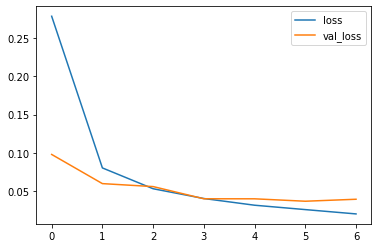

In [26]:
metrics[['loss','val_loss']].plot()

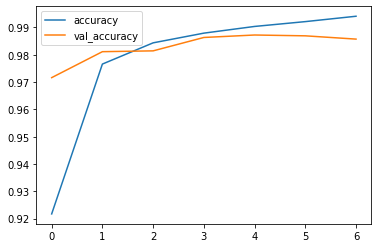

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.evaluate(X_test,y_c_test,verbose=0)

[0.03985132649540901, 0.9857000112533569]

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
predictions = predictions.reshape(10000,10)

(10000,)

In [35]:
y_c_test.shape

(10000, 10)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [37]:
print(confusion_matrix(y_test,predictions))

[[ 972    0    0    1    0    1    4    0    2    0]
 [   0 1130    1    1    0    0    2    0    1    0]
 [   2    2 1019    1    1    0    1    3    3    0]
 [   0    0    2  996    0    8    0    0    4    0]
 [   0    0    2    0  969    0    2    0    1    8]
 [   1    0    0    4    0  885    2    0    0    0]
 [   6    2    1    0    1    2  944    0    2    0]
 [   1    3    9    8    0    0    0 1000    2    5]
 [   5    0    1    2    0    1    1    1  961    2]
 [   1    2    0    7    7    5    0    1    5  981]]


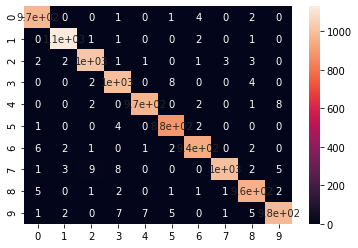

In [38]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [58]:
my_number= X_test[1000].reshape(28,28)

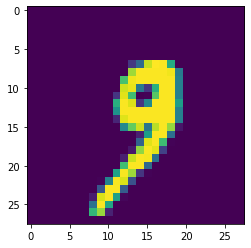

In [59]:
plt.imshow(my_number)

In [60]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([9])